In [1]:
import tensorflow
tensorflow.__version__

'2.11.0'

In [2]:
!pip show keras-vggface

In [3]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)

0.6


In [4]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
import numpy as np
import pandas as pd
import cv2
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile

from keras.models import Sequential,Model
from keras.layers import Conv2D, Activation, BatchNormalization
from keras.layers import UpSampling2D, Input, Concatenate
from keras.layers import Dense,Dropout,Softmax,Flatten
from keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import load_img,img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.metrics import Recall, Precision
from keras import backend as K


In [6]:
import os
# os.chdir('C:/Users/shihu/Desktop/Shi Hui Laptop/Koh Shi Hui (Comp)/FYP Part 1/FaceDetection/105_classes_pins_dataset')

In [7]:
directory = "./105_classes_pins_dataset/"
# for filename in os.listdir(directory):
#     #os.rename(os.path.join(directory,filename),os.path.join(directory, filename.replace(' ', '_').upper()))
#     str = "pins_"
#     if str in filename:    
#         filepath = os.path.join(directory, filename)
#         newfilepath = os.path.join(directory, filename.replace(str, "").upper())
#         os.rename(filepath, newfilepath)

# for subdir, dirs, files in os.walk(directory):
#     for file in files:
#       os.rename(os.path.join(subdir, file), os.path.join(subdir, file.replace(' ', '_')))

In [8]:
label_names = [x for x in os.listdir("./105_classes_pins_dataset/")]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format((label_names)))

Total labels: 105
Labels: ['ADRIANA_LIMA', 'ALEXANDRA_DADDARIO', 'ALEX_LAWTHER', 'ALVARO_MORTE', 'ALYCIA_DABNEM_CAREY', 'AMANDA_CREW', 'AMBER_HEARD', 'ANDY_SAMBERG', 'ANNE_HATHAWAY', 'ANTHONY_MACKIE', 'AVRIL_LAVIGNE', 'BARACK_OBAMA', 'BARBARA_PALVIN', 'BEN_AFFLECK', 'BILL_GATES', 'BOBBY_MORLEY', 'BRENTON_THWAITES', 'BRIAN_J._SMITH', 'BRIE_LARSON', 'CAMILA_MENDES', 'CHRISTIAN_BALE', 'CHRIS_EVANS', 'CHRIS_HEMSWORTH', 'CHRIS_PRATT', 'CRISTIANO_RONALDO', 'DANIELLE_PANABAKER', 'DOMINIC_PURCELL', 'DWAYNE_JOHNSON', 'ELIZABETH_LAIL', 'ELIZABETH_OLSEN', 'ELIZA_TAYLOR', 'ELLEN_PAGE', 'ELON_MUSK', 'EMILIA_CLARKE', 'EMMA_STONE', 'EMMA_WATSON', 'GAL_GADOT', 'GRANT_GUSTIN', 'GWYNETH_PALTROW', 'HENRY_CAVIL', 'HUGH_JACKMAN', 'INBAR_LAVI', 'IRINA_SHAYK', 'JAKE_MCDORMAN', 'JASON_MOMOA', 'JEFF_BEZOS', 'JENNIFER_LAWRENCE', 'JEREMY_RENNER', 'JESSICA_BARDEN', 'JIMMY_FALLON', 'JOHNNY_DEPP', 'JOSH_RADNOR', 'KATHARINE_MCPHEE', 'KATHERINE_LANGFORD', 'KEANU_REEVES', 'KIERNEN_SHIPKA', 'KRYSTEN_RITTER', 'LEONARDO_

In [9]:
import pandas as pd

df = pd.DataFrame(columns=['Person', 'No. of Images','File Path', 'Files'])

folders = [x[0] for x in os.walk(directory)]

for subfolders in folders:
  fileList = os.listdir(subfolders)
  filePath = os.path.abspath(subfolders)
  person = (subfolders)[len(directory):]
  df = df.append({'Person': person, 'No. of Images': len(fileList), 'File Path': filePath , 'Files': fileList}, ignore_index=True)

df

Person No. of Images  \
0                                 105   
1          ADRIANA_LIMA           213   
2    ALEXANDRA_DADDARIO           225   
3          ALEX_LAWTHER           152   
4          ALVARO_MORTE           139   
..                  ...           ...   
101      URSULA_CORBERO           167   
102    WENTWORTH_MILLER           179   
103           ZAC_EFRON           191   
104             ZENDAYA           138   
105         ZOE_SALDANA           186   

                                             File Path  \
0    c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
1    c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
2    c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
3    c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
4    c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
..                                                 ...   
101  c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
102  c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
103  c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
104  c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   
105  c:\Users\ILLEGEAR\Desktop\cheelam\Face_Recogni...   

                                                 Files  
0    [ADRIANA_LIMA, ALEXANDRA_DADDARIO, ALEX_LAWTHE...  
1    [Adriana_Lima0_0.jpg, Adriana_Lima101_3.jpg, A...  
2    [Alexandra_Daddario0_214.jpg, Alexandra_Daddar...  
3    [Alex_Lawther0_0.jpg, Alex_Lawther101_2.jpg, A...  
4    [Alvaro_Morte100_154.jpg, Alvaro_Morte105_155....  
..                                                 ...  
101  [Ursula_Corbero0_0.jpg, Ursula_Corbero100_3.jp...  
102  [Wentworth_Miller0_1.jpg, Wentworth_Miller101_...  
103  [Zac_Efron0_1596.jpg, Zac_Efron100_1599.jpg, Z...  
104  [Zendaya0_1787.jpg, Zendaya101_1790.jpg, Zenda...  
105  [Zoe_Saldana0_4874.jpg, Zoe_Saldana100_4877.jp...  

[106 rows x 4 columns]

Randomly picked 10 images of each person in the dataset.

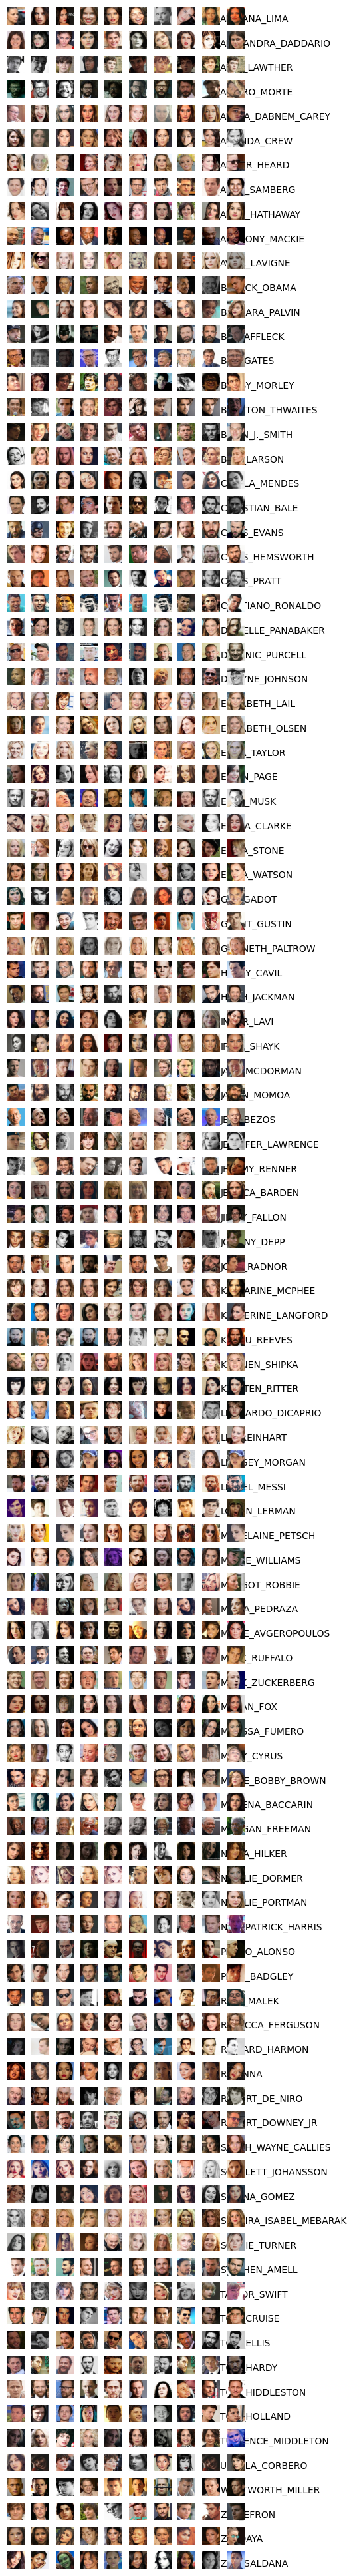

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import pyplot as plt
import numpy as np
import cv2

fig = plt.figure(1, (200, 50))
grid = ImageGrid(fig, 111, nrows_ncols=(105, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    folder = os.path.join(directory, label)
    paths = os.listdir(folder)
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    # print(folder)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(os.path.join(folder, paths[ii]))
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

Include all the images in the images array and label names in the classes array, to analyze the distribution of images.

In [11]:
TRAIN_FOLDER= "./105_classes_pins_dataset/"

images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAIN_FOLDER):
    class_folder_path = os.path.join(TRAIN_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in os.listdir(class_folder_path):
        image_bgr = cv2.imread(os.path.join(class_folder_path, image_path), cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missing value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

In [12]:
len(images)

17534

Resize all the images to 224 x 224 pixels.

In [13]:
# resize image
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(224,224), interpolation = cv2.INTER_CUBIC)
  return res

#save resized images into images.
images = [resize_images(img) for img in images]

In [14]:
images[0].shape

(224, 224, 3)

The images are colored. Thus they are 3 dimensional containing red, green and blue channels.

In [15]:
#see number of images in each label
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)

images shape:  (17534, 224, 224, 3)
classes shape:  (17534,)


Viewing the distribution of number of images in each class

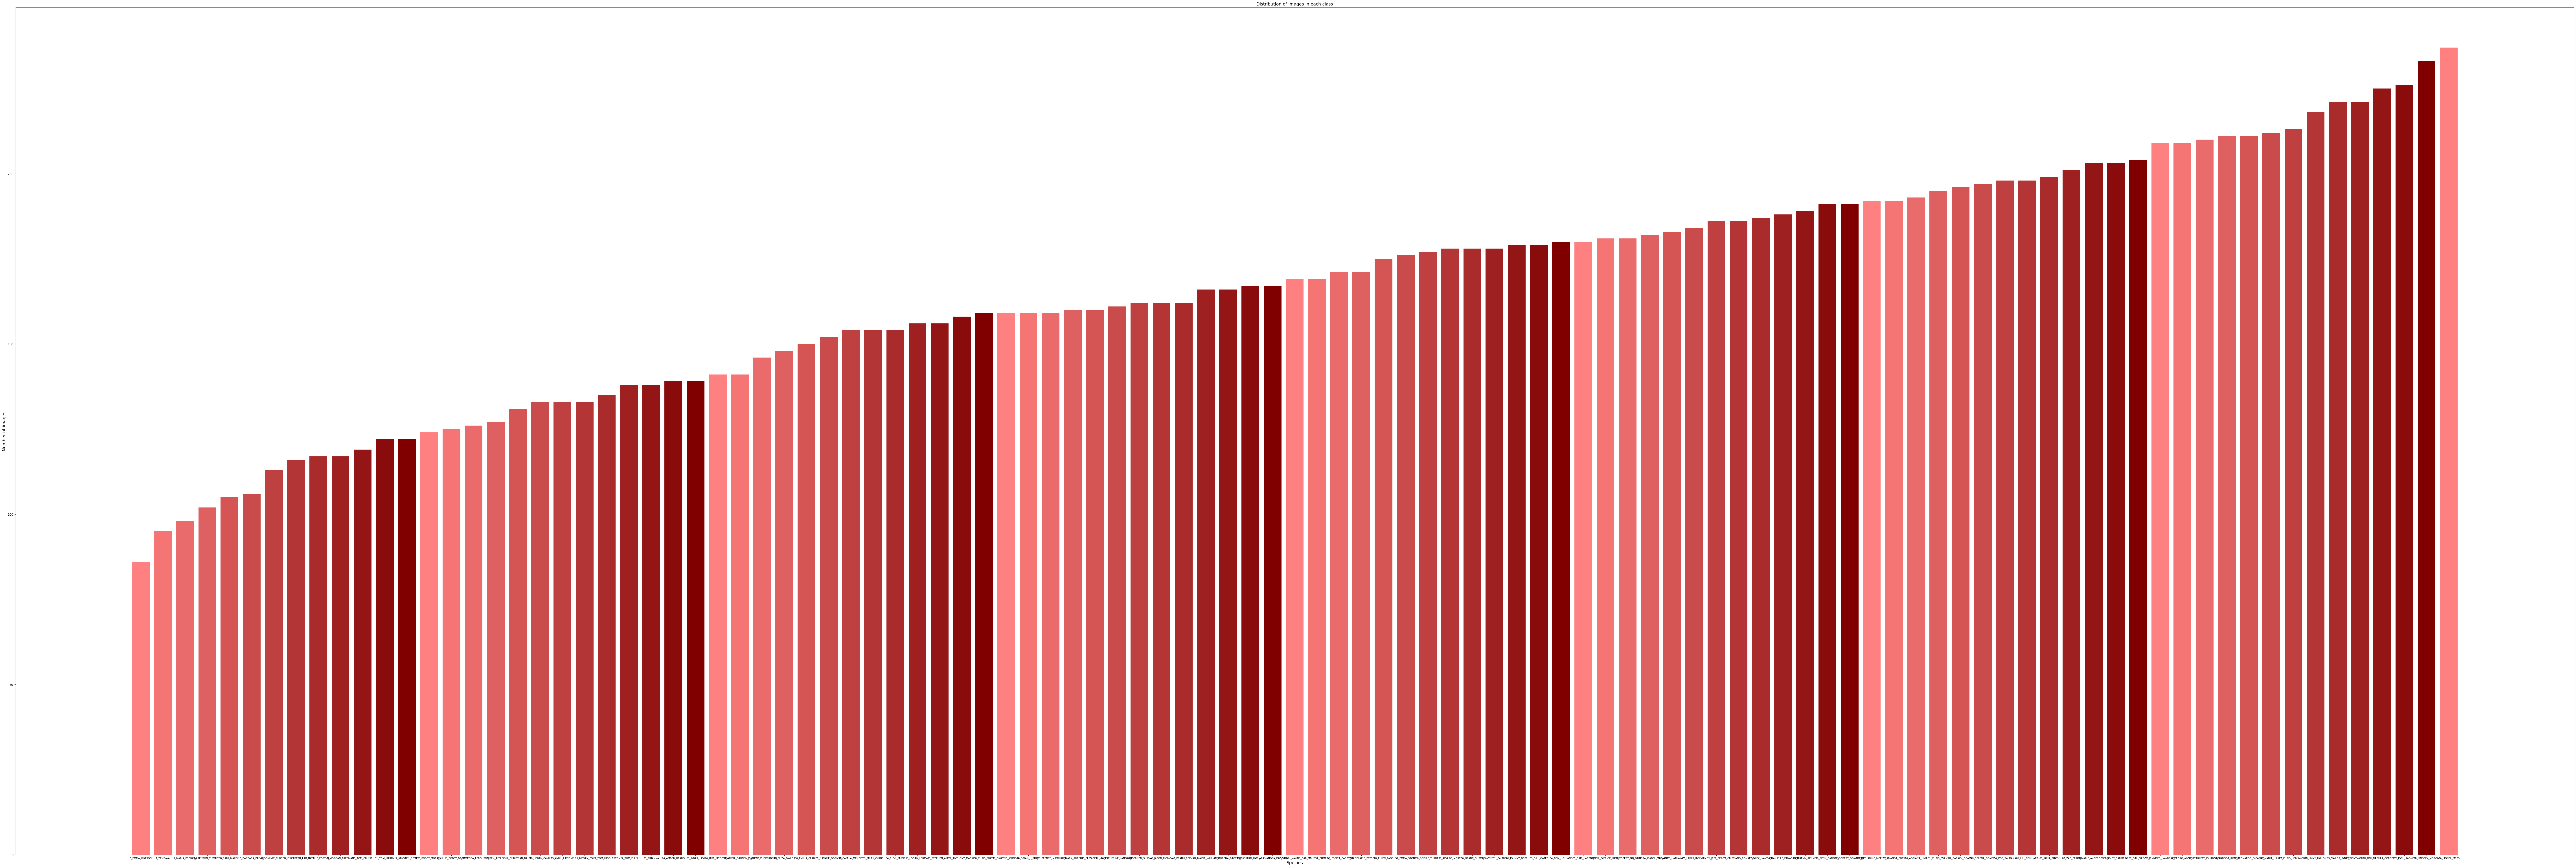

In [16]:
import matplotlib as mp

values =[]
labels=[]
for i, label in enumerate(set(classes)):
  values.append(len(images[classes == label]))
  labels.append(f"{i}_{label}")

values.sort()

code=np.arange(0,13,1)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

fig, ax = plt.subplots(figsize=(150,50))
ax.bar(labels, values, color=color_map(data_normalizer(code)))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.xlabel("Species", fontsize = 14)
plt.ylabel("Number of images", fontsize = 14)
plt.title("Distribution of images in each class", fontsize=14)
plt.show()

Not all the folders have equal number of images. The dataset is imbalanced.

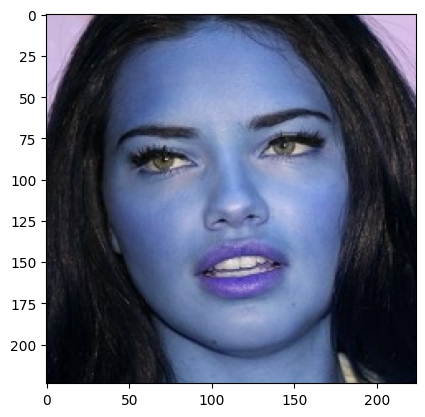

In [17]:
plt.imshow(images[50])

Viewing images based on a class

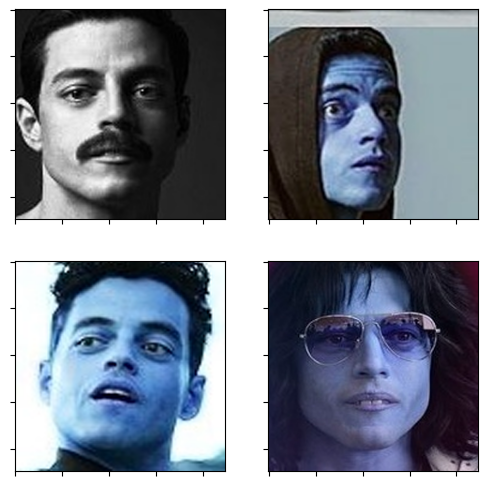

In [18]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("RAMI_MALEK")

Face Detection using MTCNN

In [19]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


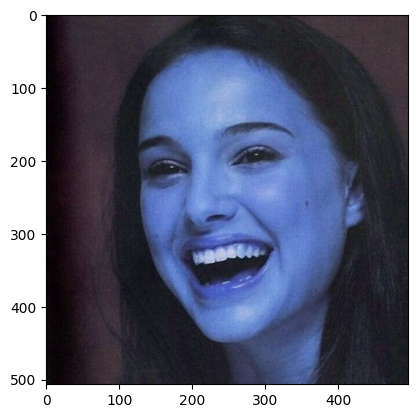

In [20]:
sample_pic = '105_classes_pins_dataset/NATALIE_PORTMAN/Natalie_Portman19_3500.jpg'

# load image from file
image = cv2.imread(sample_pic)
plt.imshow(image)

In [21]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [22]:
from mtcnn import MTCNN

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(image)
for face in faces:
  print(face)

1/1 [==============================] - 0s 182ms/step
{'box': [118, 74, 276, 360], 'confidence': 0.9996047616004944, 'keypoints': {'left_eye': (171, 215), 'right_eye': (293, 197), 'nose': (214, 266), 'mouth_left': (190, 341), 'mouth_right': (312, 325)}}


The result is a list of bounding boxes with coordinates, or the pixel values of a rectangle where the MTCNN algorithm detected faces.

Highlighting faces to evaluate MTCNN face detection output

In [23]:
from matplotlib.patches import Rectangle

In [24]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

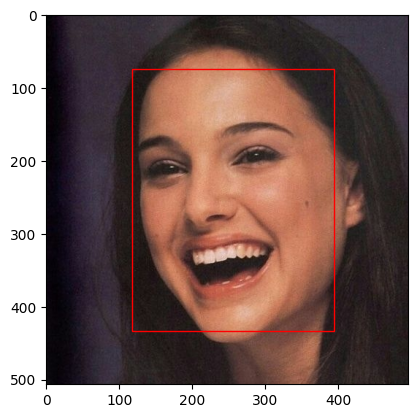

In [25]:
highlight_faces('105_classes_pins_dataset/NATALIE_PORTMAN/Natalie_Portman19_3500.jpg', faces)

1/1 [==============================] - 0s 28ms/step


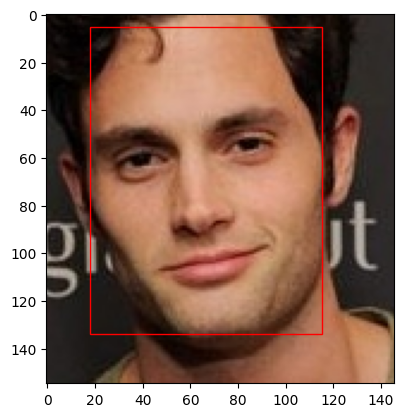

In [26]:
image = plt.imread('105_classes_pins_dataset/PENN_BADGLEY/Penn_Badgley3_2330.jpg')
faces = detector.detect_faces(image)

highlight_faces('105_classes_pins_dataset/PENN_BADGLEY/Penn_Badgley3_2330.jpg', faces)

 MTCNN algorithm correctly detects faces.
 

Cropping faces for further analysis


In [27]:
from PIL import Image

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = cv2.imread(filename)

	# create the detector, using default weights
	detector = MTCNN()
 
	# detect faces in the image
	results = detector.detect_faces(pixels)
 
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height

	# extract the face
	face = pixels[y1:y2, x1:x2]

	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = np.asarray(image)
	return face_array

1/1 [==============================] - 0s 134ms/step


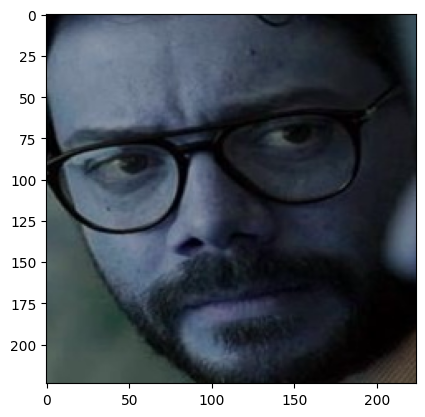

In [29]:
# load the photo and extract the face
pixels = extract_face('./105_classes_pins_dataset/ALVARO_MORTE/Alvaro_Morte105_156.jpg')

# plot the extracted face
plt.imshow(pixels)

# show the plot
plt.show()

Try using full body photos to extract face

Face Identification using VGGFace Model.  <br>Training the VGG16 model and loading the weights it was trained on. <br>Define the VGG16 architecture. 

In [30]:
# Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [31]:
# Remove last Softmax layer and get model upto last flatten layer #with outputs 2622 units 
vgg_face_descriptor=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output) 

In [32]:
from numpy import expand_dims
from keras_vggface.utils import preprocess_input

# load the photo and extract the face
pixels = extract_face('105_classes_pins_dataset/NATALIE_PORTMAN/Natalie_Portman18_3494.jpg')

# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)

# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

1/1 [==============================] - 0s 145ms/step


In [33]:
from keras_vggface.utils import decode_predictions

# perform prediction
yhat = vgg_face_descriptor.predict(samples)

# convert prediction into names
results = decode_predictions(yhat)

# display most likely results
for result in results[0]:
	print('%s: %.2f%%' % (result[0], result[1]))

346184/346184 [==============================] - 0s 0us/step
b'Natalie_Portman': 20.13%
b'Shailene_Woodley': 12.61%
b'Natalie_Morales': 9.28%
b'Jessica_McNamee': 8.93%
b'Kristina_Anapau': 8.84%


In [34]:
def get_embeddings(filenames):
	# extract faces
	faces = [extract_face(f) for f in filenames]
	# convert into an array of samples
	samples = np.asarray(faces, 'float32')
	# prepare the face for the model, e.g. center pixels
	samples = preprocess_input(samples, version=2)

	# perform prediction
	yhat = vgg_face_descriptor.predict(samples)
	return yhat

In [35]:
from scipy.spatial.distance import cosine

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# calculate distance between embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [36]:
# define filenames
filenames = ['105_classes_pins_dataset/CAMILA_MENDES/camila_mendes0_948.jpg','105_classes_pins_dataset/LILI_REINHART/Lili_Reinhart3_2815.jpg','105_classes_pins_dataset/CAMILA_MENDES/camila_mendes207_1024.jpg',
             '105_classes_pins_dataset/CAMILA_MENDES/camila_mendes223_1038.jpg',]
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define natalie
natalie_id = embeddings[0]


is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
is_match(embeddings[0], embeddings[3])

1/1 [==============================] - 1s 573ms/step
>face is NOT a Match (0.504 > 0.500)
>face is a Match (0.252 <= 0.500)
>face is a Match (0.225 <= 0.500)
